In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

### Problem Statement :

We will be looking at the delivery data for a particular shipping company. The two main tasks that we shal perform in this notebook are : 

-  Cleaning, sanitizing and manipulating data to get useful features out of raw fields.

-  Making sense out of the raw data to provide business insights/recommendations and to help data science team to build forecasting models on it.

This would involve performing exploratory data analysis, building new features to help in further analysis, testing various hypothesis to gain meaningful insights and finally providing suitable recommendations. 

In [2]:
df = pd.read_csv("data/delivery_data.csv")
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

#### 
### 1. Basic Data Cleaning and Exploration

#### 1.1 Handling Missing Values
#### 

In [4]:
for col in df.columns:
    n_nulls = df[col].isna().sum()
    if(n_nulls>0):
        print("Column '" + str(col)+"' has "+str(n_nulls)+" null values.")

Column 'source_name' has 293 null values.
Column 'destination_name' has 261 null values.


We see that the 'source_name' and 'destination_name' columns have null values (about 290 + 258 + 3 = 551, we subtract 3 because of common rows which have both columns null). We remove those 551 rows. These constitute of only 0.38% of total rows. 



In [5]:
df[(df["destination_name"].isna()) & (df["source_name"].isna())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
68006,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,True,22,2018-09-27 05:01:28,25.178605,26.0,23.0,25.7246,1.130435,26.0,23.0,25.7246,1.130435
68007,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,True,44,2018-09-27 03:33:17,45.101167,114.0,44.0,54.6110,2.590909,88.0,21.0,28.8863,4.190476
68008,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,False,50,2018-09-27 03:19:19.935198,50.844665,128.0,49.0,60.9205,2.612245,13.0,4.0,6.3096,3.250000


In [6]:
df = df.dropna(subset = ['destination_name','source_name'])

In [7]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


#### 
#### 1.2 Analysing the structure of the data

In [8]:
df.shape

(144316, 24)

So we see that there are 144316 rows and 24 columns. We can see the detailed description of the columns as given below:

#### Column Profiling

 - data - tells whether the data is testing or training data                         
 - trip_creation_time – Timestamp of trip creation
 - route_schedule_uuid – Unique Id for a particular route schedule
 - route_type – Transportation type 
     - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs  along the way
     - Carting: Handling system consisting of small vehicles (carts)
 - trip_uuid - Unique ID given to a particular trip   (A trip may include different source and destination centers)                
 - source_center - Source ID of trip origin                 
 - source_name - Source Name of trip origin                    
 - destination_cente – Destination ID         
 - destination_name – Destination Name              
 - od_start_time – Trip start time                
 - od_end_time –  Trip end time                                
 - start_scan_to_end_scan – Time taken to deliver from source to destination    
 - is_cutoff – Unknown field                   
 - cutoff_factor  – Unknown field                       
 - cutoff_timestamp –  Unknown field             
 - actual_distance_to_destination – Distance in Kms between source and destination warehouse
 - actual_time –  Actual time taken to complete the delivery (Cumulative)
 - osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
 - osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
 - factor  –  Unknown field                 
 - segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
 - segment_osrm_time –  This is the OSRM segment time. Time taken by the subset of the package delivery      
 - segment_osrm_distance –   This is the OSRM distance. Distance covered by subset of the package delivery       
 - segment_factor – Unknown field  

We convert the 'trip_creation_time', trip start time ('od_start_time') and end time ('od_end_time') to datetime format. 

In [9]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

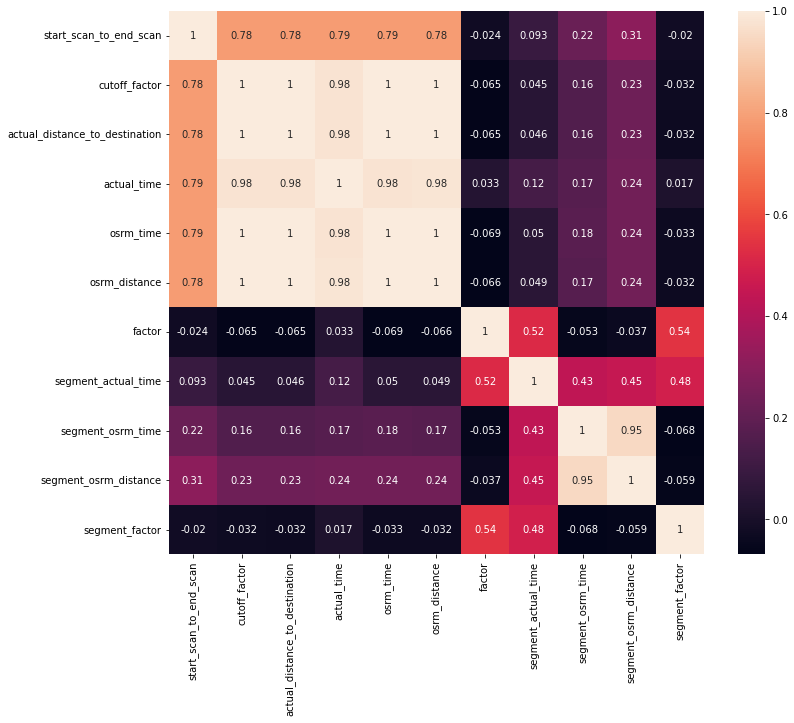

In [10]:
numeric_columns =['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor']

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.show()

So we see that certain fields are highly correlated :
 - cut-off factor : osrm_time, actual_time, osrm_distance, actual_distance_to_destination, start_scan_to_end_scan.
 - start_scan_to_end_scan : osrm_time, actual_time, osrm_distance, actual_distance_to_destination.
 
 - osrm_time, actual_time, osrm_distance, actual_distance_to_destination are all highly correlated to each other, which is expected because distance will effect time, and osrm calculation will be somewhat close to actual (even if not perfect).
 -  segment_osrm_time and segment_osrm_distance are also highly correlated as expected.
 - we see poor correlation between segment_actual_time and segment_osrm_time (even though overall actual_time and osrm_time are highly correlated).
#### 

In [11]:
df.describe(datetime_is_numeric=True).transpose()

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144316,2018-09-22 13:05:09.454117120,2018-09-12 00:00:16.535741,2018-09-17 02:46:11.004421120,2018-09-22 03:36:19.186585088,2018-09-27 17:53:19.027942912,2018-10-03 23:59:42.701692,NaN
od_start_time,144316,2018-09-22 17:32:42.435769344,2018-09-12 00:00:16.535741,2018-09-17 07:37:35.014584832,2018-09-22 07:35:23.038482944,2018-09-27 22:01:30.861209088,2018-10-06 04:27:23.392375,NaN
od_end_time,144316,2018-09-23 09:36:54.057172224,2018-09-12 00:50:10.814399,2018-09-18 01:29:56.978912,2018-09-23 02:49:00.936600064,2018-09-28 12:13:41.675546112,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144316.0,963.697698,20.0,161.0,451.0,1645.0,7898.0,1038.082976
cutoff_factor,144316.0,233.561345,9.0,22.0,66.0,286.0,1927.0,345.245823
actual_distance_to_destination,144316.0,234.708498,9.000045,23.352027,66.135322,286.919294,1927.447705,345.480571
actual_time,144316.0,417.996237,9.0,51.0,132.0,516.0,4532.0,598.940065
osrm_time,144316.0,214.437055,6.0,27.0,64.0,259.0,1686.0,308.448543
osrm_distance,144316.0,285.549785,9.0082,29.89625,78.6244,346.3054,2326.1991,421.717826
factor,144316.0,2.120178,0.144,1.604545,1.857143,2.21228,77.387097,1.717065


In [12]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
data,144316,2,training,104632
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144316,2,FTL,99132
trip_uuid,144316,14787,trip-153837029526866991,101
source_center,144316,1496,IND000000ACB,23267
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,144316,1466,IND000000ACB,15192
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192
cutoff_timestamp,144316,92894,2018-09-24 05:19:20,39


#### 
#### 1.3 Merging the Rows and Condensing and Further Preparing the Data.

A trip may include different source and destination centers. So, the delivery details of one package is divided into several rows (like connecting flights to reach a particular destination). We shall combine these rows to prepare our data for analysing overall time and distances.

We will use different aggregations like cumulative sums, first/last element, sums, etc to merge the rows.
This merging will be done in 2 phases :

  1. Merging rows based on a unique <'segment_key' made of 'trip_uuid', 'source_center', 'destination_center'>
  2. Further aggregate on the basis of only 'trip_uuid'. 


In [13]:
df['segment_key'] = df["trip_uuid"]+df["source_center"]+df["destination_center"]

segment_cols = ['segment_actual_time','segment_osrm_time','segment_osrm_distance']

for col in segment_cols:
    df[col + '_sum'] = df.groupby(['segment_key'])[col].cumsum()
    
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


So, above, we have aggregated the time and distances of each segment using cumulative sum. So, <segment_actual_time_sum, segment_osrm_time_sum and segment_osrm_distance_sum> should ideally be equal <to actual_time, osrm_time and osrm_distance>, but that is not the case actually. 
#### 

In [14]:
df.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,39.0,45.5619


Next we perform our first level of aggregations using segment_key defined above. 

In [15]:
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last', #we need to take the last destination for this trip segment
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last', #since it is already cumulative
    'actual_time' : 'last', #since it is already cumulative
    
    'osrm_time' : 'last', #since it is already cumulative
    'osrm_distance' : 'last', #since it is already cumulative
    
    'segment_actual_time_sum' : 'last', #we calculated it above using cumulative sums
    'segment_osrm_time_sum' : 'last', #we calculated it above using cumulative sums
    'segment_osrm_distance_sum' : 'last' #we calculated it above using cumulative sums
}

In [16]:
segment = df.groupby(['segment_key']).agg(create_segment_dict).reset_index()
segment = segment.sort_values(by = ['segment_key','od_end_time'], ascending=True).reset_index()

In [17]:
segment[segment['trip_uuid']=='trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


Now, as we see above, the particular trip-uuid has two entries associated with it. We will further aggregate using only trip-uuid to have just one entry for each uuid.

In [18]:
segment.shape

(26222, 21)

In [19]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

So we have reduced the number of rows from 144316 to just 26222. We now have 22 columns.

#### We calculate time taken between od_start_time and od_end_time and keep it as a feature.

We will later check if od_time_diff_hour is matching with start_scan_to_end_scan.

In [20]:
segment["od_time_diff_hour"] = (segment["od_end_time"] - segment["od_start_time"]).dt.total_seconds()/(60)
segment["od_time_diff_hour"]

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [21]:
segment[segment['trip_uuid']=='trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772,86.213637
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334,109.173183


We now perform the second level of aggregations using only 'trip_uuid'. This will mostly involve summing up the individual segments for certain fields involving time and distances.

In [22]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum', 
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum'
}

In [23]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip.shape

(14787, 18)

So, now we have only 14787 rows and 18 columns.

In [24]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [25]:
trip[trip['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


In [26]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [27]:
trip["destination_name"] = trip["destination_name"].str.lower()
trip["source_name"] = trip["source_name"].str.lower()

In [28]:
trip.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766


#### 
#### 
### 2. Building Features to Prepare the Data for Actual Analysis

#### 
We first look at the following two features and extract relevant information from those :
 - Destination Name: We split and extract features out of destination. City-place-code (State)
 - Source Name: We split and extract features out of destination. City-place-code (State)


In [29]:
#One way to extract the data would be to use regular expressions.

import re

def getstate(x):
    if x is not np.nan:
        st = re.search("\([a-zA-Z]*( \&)?( [a-zA-Z]*){0,3}\)",x)
        if st is not None:
            return st.group()[1:-1]
    
#df["destination_state"] = df["destination_name"].apply(getstate)
#df["source_state"] = df["source_name"].apply(getstate)


def getcity(x):
    if x is not np.nan:
        st = re.search("^[a-zA-Z]*(_| )?",x)
        if st is not None:
            return st.group()[:-1]
        
#df["destination_city"] = df["destination_name"].apply(getcity)
#df["source_city"] = df["source_name"].apply(getcity)

In [30]:
def place2state(x):
    state = x.split('(')[1]
    return state[:-1]

def place2city(x):
    city = x.split('(')[0]
    city=city.split('_')[0]
    
    #dealing with edge cases
    if city == "pnq vadgaon shei dpc" : city = "vadgaonsheri"
    if city in ["pnq pashan dpc", "pnq rahatani dpc", "pune balaji nagar"] : city = 'pune'
        
    if city == "hbr layout pc" : city = "bengaluru"
    if city == "bhopal mp nagar" : city = "bhopal"
    if city == "mumbai antop hill" : city = "mumbai"
    if city == "bangalore" : city = "bengaluru"
    if city == "mumbai hub " : city = "mumbai"
        
    return city


def place2city_place(x):
    #removing state
    x = x.split('(')[0]
    
    len_ = len(x.split('_'))
    
    if len_ >= 3: 
        return x.split('_')[1]
    
    #small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]
    
    #dealing with edge cases or improper naming conventions
    return x.split(' ')[0]


def place2code(x):
    #removing state
    x = x.split('(')[0]
    
    if(len(x.split('_')) >=3):
        return x.split('_')[-1]
    
    return 'none'

In [31]:
trip["destination_state"] = trip["destination_name"].apply(lambda x: place2state(x))
trip["destination_city"] = trip["destination_name"].apply(lambda x: place2city(x))
trip["destination_place"] = trip["destination_name"].apply(lambda x: place2city_place(x))
trip["destination_code"] = trip["destination_name"].apply(lambda x: place2code(x))

In [32]:
trip["source_state"] = trip["source_name"].apply(lambda x: place2state(x))
trip["source_city"] = trip["source_name"].apply(lambda x: place2city(x))
trip["source_place"] = trip["source_name"].apply(lambda x: place2city_place(x))
trip["source_code"] = trip["source_name"].apply(lambda x: place2code(x))

In [33]:
trip[["destination_state","destination_city","destination_place","destination_code"]]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


Next we extract features from trip_creation_time. These features include : Year, Month, Day, Week, DayofWeek, Hour.

In [34]:
trip["trip_creation_time"] = pd.to_datetime(trip["trip_creation_time"])

trip["trip_year"] = trip["trip_creation_time"].dt.year
trip["trip_month"] = trip["trip_creation_time"].dt.month
trip["trip_hour"] = trip["trip_creation_time"].dt.hour
trip["trip_day"] = trip["trip_creation_time"].dt.day
trip["trip_week"] = trip["trip_creation_time"].dt.isocalendar().week
trip["trip_dayofweek"] = trip["trip_creation_time"].dt.dayofweek

In [35]:
trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


#### 
### 3. In-Depth Analysis and Feature Engineering

#### Finding, visualizing and removing outliers (using IQR) from numeric variables

In [36]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_time_diff_hour               14787 non-null  float64       
 11  ac

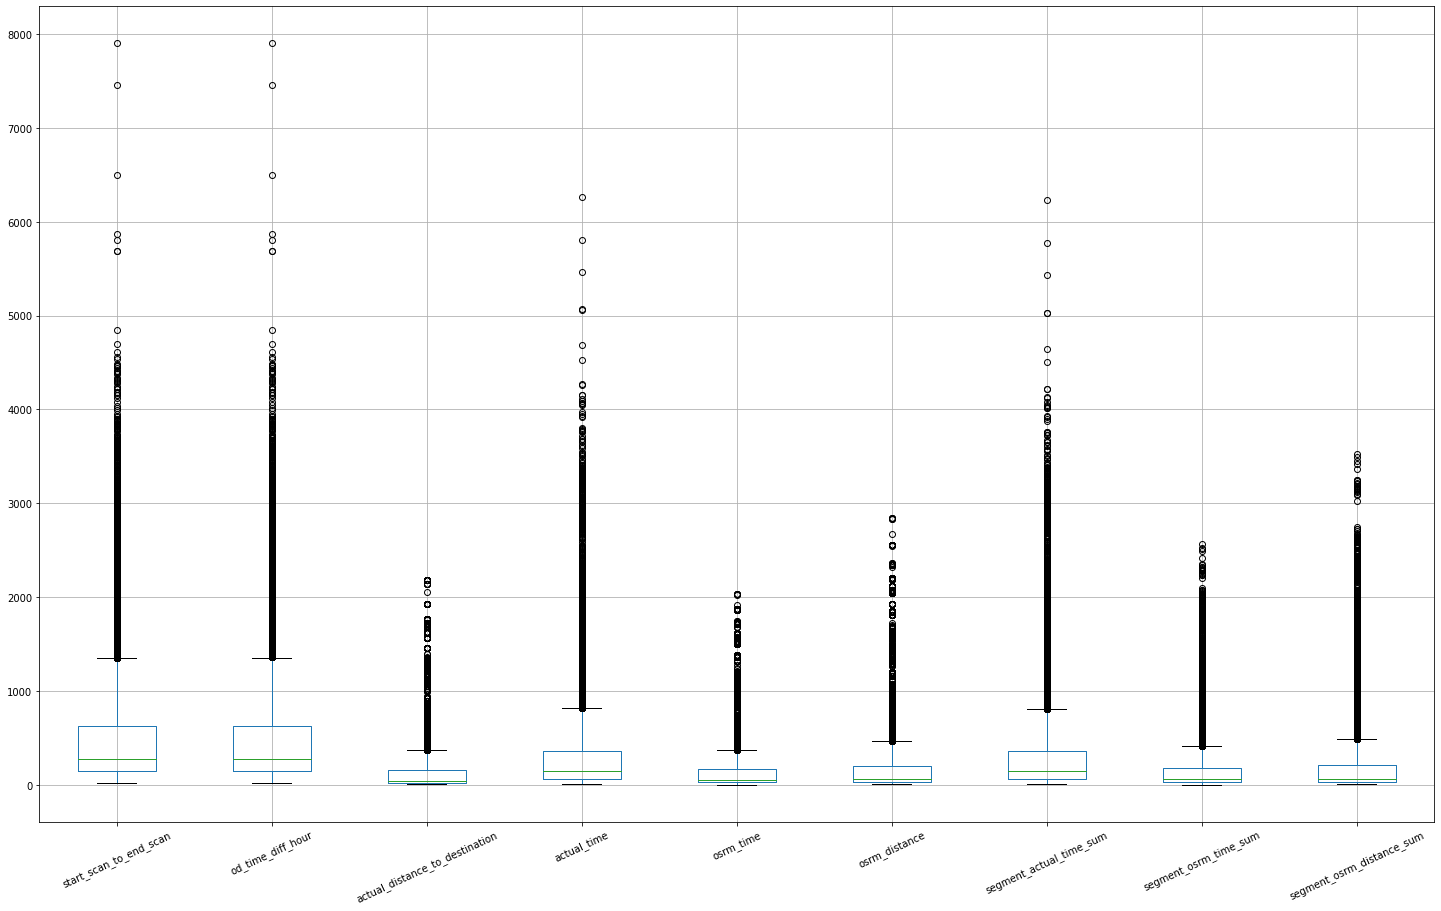

In [37]:
num_cols = ['start_scan_to_end_scan','od_time_diff_hour','actual_distance_to_destination', 
            'actual_time','osrm_time', 'osrm_distance','segment_actual_time_sum', 
            'segment_osrm_time_sum', 'segment_osrm_distance_sum']

trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

In [38]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3-Q1

In [39]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR))|(trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

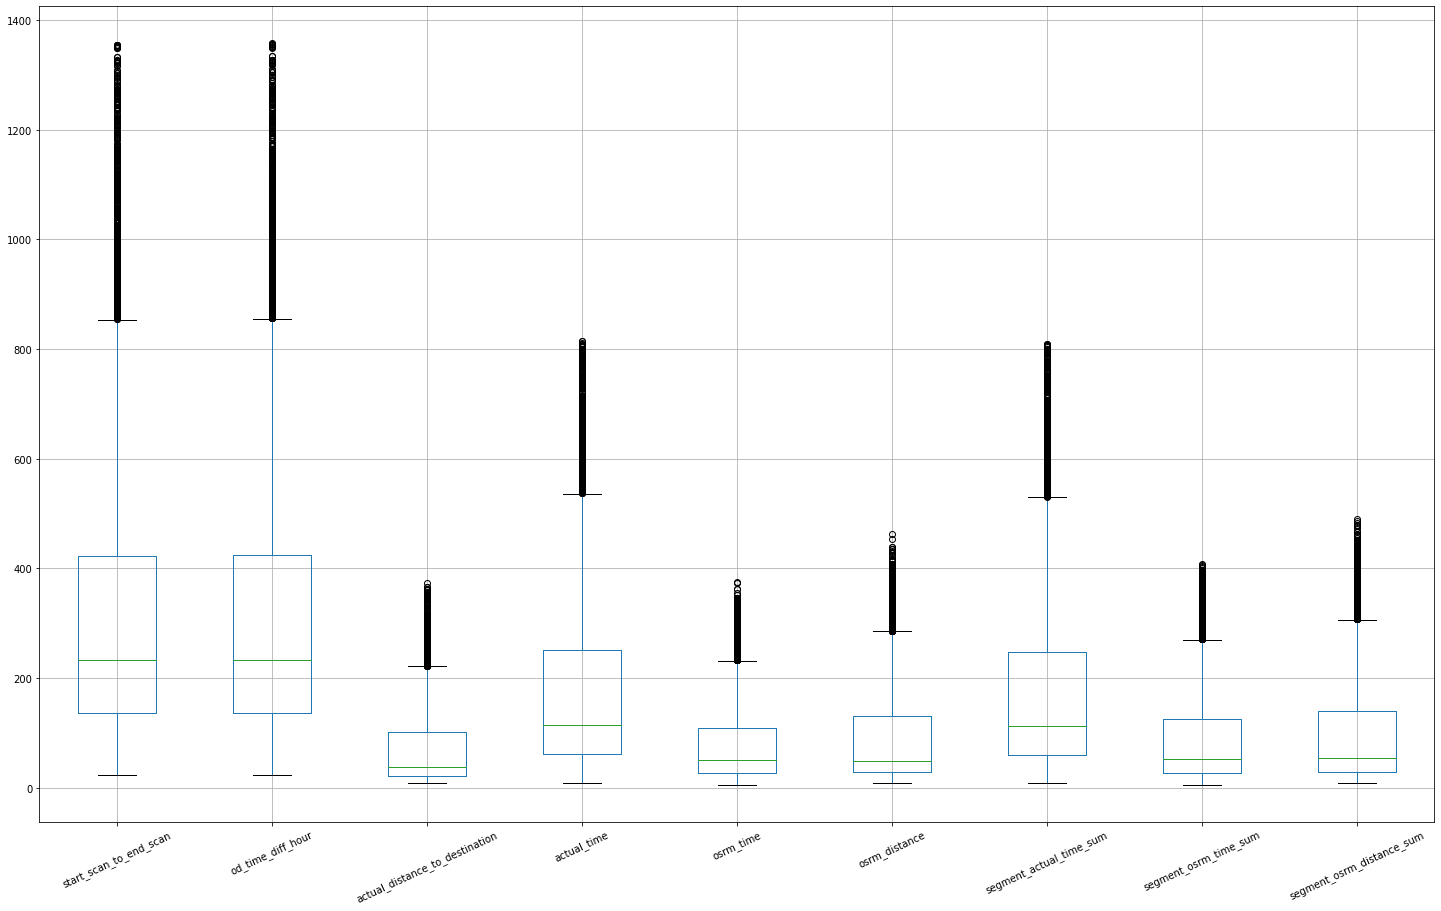

In [40]:
trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

#### Handling Categorical Variables

Since there are only two types of routes, we encode one of those as 0 and the other as 1.

In [41]:
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [42]:
trip["route_type"] = trip["route_type"].map({'FTL':0,'Carting':1})

In [43]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,maharashtra,mumbai,mirard,ip,maharashtra,mumbai,mumbai,none,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,tamil nadu,chennai,chennai,none,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2


#### Some more EDA on the cleaned and condensed data.

#### Univariate Analysis
#### 

#### Distribution of Route Types

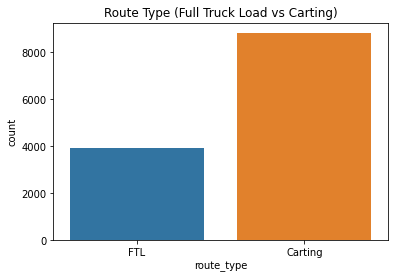

In [44]:
ax = sns.countplot(x = "route_type", data = trip)
ax.set_xticklabels(["FTL","Carting"])
plt.title("Route Type (Full Truck Load vs Carting)")
plt.show()

The majority of trips (8812) involved handling systems made of small vehicles (carts).

The rest of the trips (3911) involved Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.

#### Top source and destination cities.

In [45]:
source300 = trip["source_city"].value_counts()[0:8]
destination300 = trip["destination_city"].value_counts()[0:8]

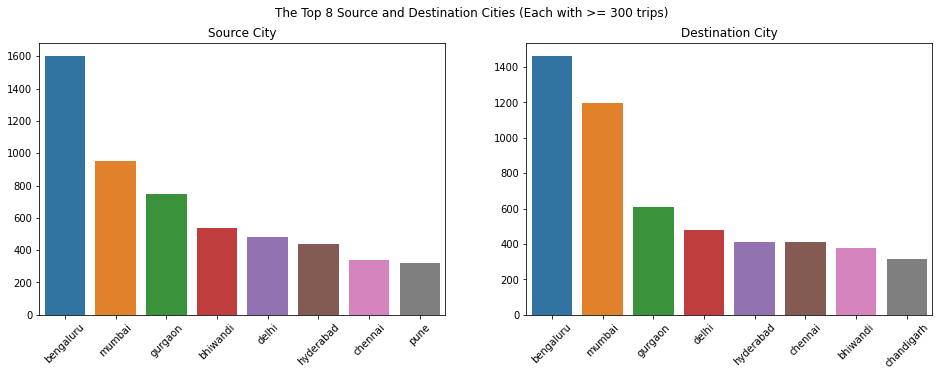

In [46]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.barplot(x = np.linspace(0,1,8), y = source300.values, data = source300, ax = ax[0])
ax[0].set_xticklabels(source300.index,rotation=45)
ax[0].set_title("Source City")

sns.barplot(x = np.linspace(0,1,8), y = destination300.values, data = destination300, ax = ax[1])
ax[1].set_xticklabels(destination300.index,rotation=45)
ax[1].set_title("Destination City")

plt.suptitle("The Top 8 Source and Destination Cities (Each with >= 300 trips)")

plt.show()

So we see that Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. More trips are starting at Bhiwandi than ending there. Delhi, Hyderabad and Chennai also maintain their relative ordering in source and destination.

In [47]:
trip.groupby(['destination_city','source_city'])['actual_time'].sum().reset_index().sort_values(by='actual_time', ascending=False)

,destination_city,source_city,actual_time
186,bengaluru,bengaluru,121144.0
1053,mumbai,mumbai,50277.0
645,hyderabad,hyderabad,44130.0
1049,mumbai,bhiwandi,32402.0
565,gurgaon,delhi,30993.0
...,...,...,...
300,chabua,dibrugarh,24.0
302,chalakudy,angamaly,23.0
631,howrah,kolkata,19.0
1055,mumbai,mumbai mahim,18.0


In [48]:
trip.groupby(['destination_city','source_city'])['actual_distance_to_destination'].sum().reset_index().sort_values(by='actual_distance_to_destination', ascending=False)

,destination_city,source_city,actual_distance_to_destination
186,bengaluru,bengaluru,42937.780295
645,hyderabad,hyderabad,15461.602801
1053,mumbai,mumbai,12524.846027
409,delhi,gurgaon,11063.119871
1049,mumbai,bhiwandi,9864.383562
...,...,...,...
386,daman,vapi,9.376028
1055,mumbai,mumbai mahim,9.362187
1160,paranpur,manikchak,9.100748
1120,north delhi,delhi,9.045083


#### Top source and destination states.

In [49]:
sourcestate10 = trip["source_state"].value_counts()[0:10]
destinationstate10 = trip["destination_state"].value_counts()[0:10]

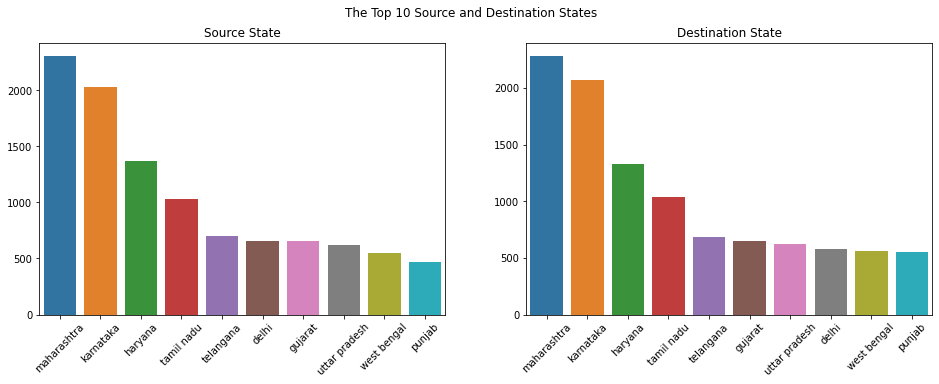

In [50]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.barplot(x = np.linspace(0,1,10), y = sourcestate10.values, data = sourcestate10, ax = ax[0])
ax[0].set_xticklabels(sourcestate10.index,rotation=45)
ax[0].set_title("Source State")

sns.barplot(x = np.linspace(0,1,10), y = destinationstate10.values, data = destinationstate10, ax = ax[1])
ax[1].set_xticklabels(destinationstate10.index,rotation=45)
ax[1].set_title("Destination State")

plt.suptitle("The Top 10 Source and Destination States")
plt.show()

We see that the same 10 states are the top source and destination states for the trips. Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana.

In [51]:
trip.groupby(['source_state','destination_state'])['actual_time'].sum().reset_index().sort_values(by='actual_time', ascending=False)

,source_state,destination_state,actual_time
56,maharashtra,maharashtra,268491.0
43,karnataka,karnataka,261334.0
75,tamil nadu,tamil nadu,153442.0
79,telangana,telangana,130197.0
84,uttar pradesh,uttar pradesh,122282.0
...,...,...,...
9,assam,nagaland,306.0
74,tamil nadu,kerala,249.0
72,tamil nadu,andhra pradesh,234.0
85,uttar pradesh,uttarakhand,152.0


In [52]:
trip.groupby(['destination_state','source_state'])['actual_distance_to_destination'].sum().reset_index().sort_values(by='actual_distance_to_destination', ascending=False)

,destination_state,source_state,actual_distance_to_destination
40,karnataka,karnataka,103882.587719
56,maharashtra,maharashtra,97873.000720
77,tamil nadu,tamil nadu,70873.071768
80,telangana,telangana,56633.784572
0,andhra pradesh,andhra pradesh,50976.404367
...,...,...,...
59,mizoram,assam,128.424011
47,kerala,tamil nadu,99.858307
86,uttarakhand,uttar pradesh,70.772628
60,nagaland,assam,58.732392


#### Trip month

In [53]:
trip["trip_month"].value_counts()

9     11172
10     1551
Name: trip_month, dtype: int64

The trips are recorded only for the months of September and October. The recording perhaps stopped after that. So we do not analyse further on the basis of month.

#### Trip Hour Distribution.

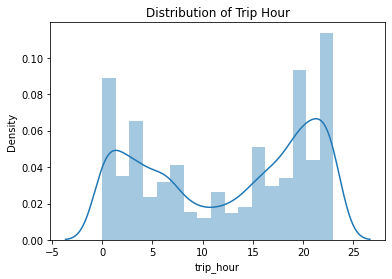

In [54]:
sns.distplot(trip["trip_hour"])
plt.title("Distribution of Trip Hour")
plt.show()

So, we observe a kind of bimodal distribution with minimum trips occuring during the day hours (8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).

#### Trip Day of Week Distribution

In [55]:
trip["trip_dayofweek"] = trip["trip_dayofweek"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
trip["trip_dayofweek"].value_counts()

Wed      2352
Sat      1836
Thurs    1819
Fri      1774
Tue      1766
Mon      1697
Sun      1479
Name: trip_dayofweek, dtype: int64

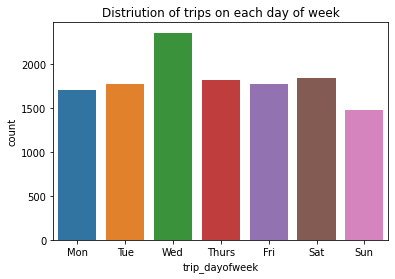

In [56]:
sns.countplot(x = "trip_dayofweek",data=trip, order=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.title("Distriution of trips on each day of week")
plt.show()

So we see that maximum number of trips are happening on Wednesday and minimum on Sunday.

#### Distribution of Actual and Calculated(OSRM) Time Taken for Trips

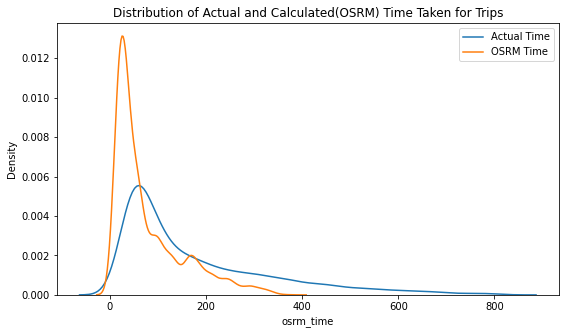

In [57]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
sns.distplot(trip["osrm_time"], hist=False, label = "OSRM Time")

plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Time Taken for Trips")
plt.show()

So we see that actual time distribution has a kind of skewed distribution.
Also, OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.

#### Distribution of Actual and Calculated(OSRM) Distance of Trips

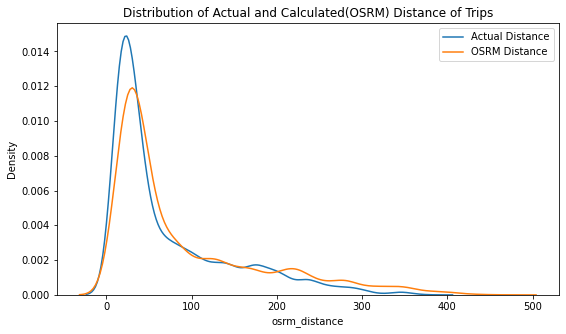

In [58]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_distance_to_destination"], hist=False, label = "Actual Distance")
sns.distplot(trip["osrm_distance"], hist=False, label = "OSRM Distance")

plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Distance of Trips")
plt.show()

As we can see, the distributions are similar, however, OSRM distance has greater spread than actual (which means distance covered actually is on the lower side as compared to OSRM calculated).

#### Start Scan to End Scan vs Differnce between Trip Start and End

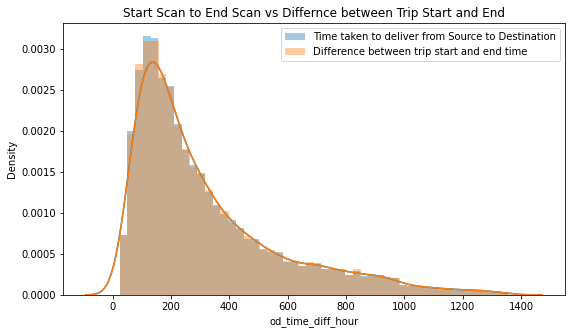

In [59]:
plt.figure(figsize=(9,5))
sns.distplot(trip["start_scan_to_end_scan"],  label = "Time taken to deliver from Source to Destination")
sns.distplot(trip["od_time_diff_hour"],  label = "Difference between trip start and end time")

plt.legend()
plt.title("Start Scan to End Scan vs Differnce between Trip Start and End")
plt.show()

There is not much difference between the above two variables.

#### 
#### Bivariate Analysis

In [60]:
trip.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.111,141.0,65.0,84.1894,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,Wed


#### Does the distribution of time taken depend on the route type (carting vs full truck load) ?

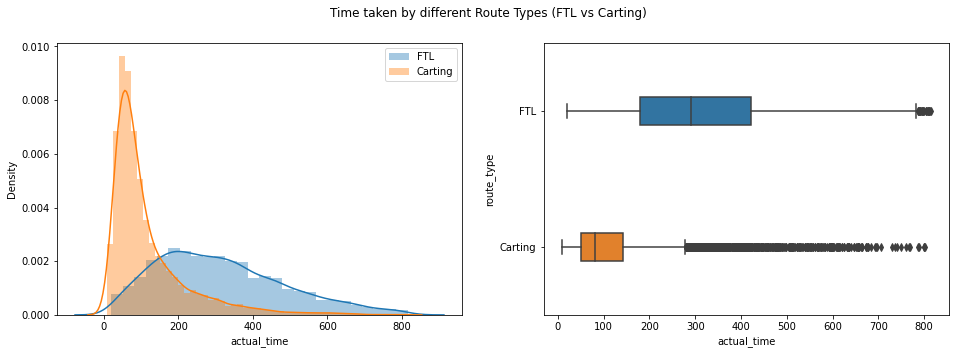

In [61]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(trip[trip["route_type"]==0]["actual_time"],  label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_time"],  label = "Carting", ax = ax[0])

sns.boxplot(x = "actual_time", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])
plt.suptitle("Time taken by different Route Types (FTL vs Carting)")
plt.show()

So we see that the time taken by full truck load deliveries is on average, a lot higher (>300 hours) (probably because the distance covered by trucks is also mucvh higher since they don't make stops) than the cart deliveries (<100 hours).


#### Does the distribution of distance covered depend on the route type (carting vs full truck load) ?

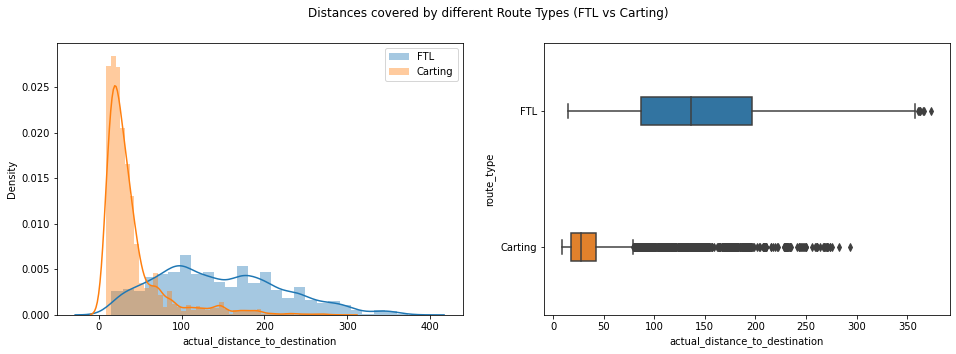

In [62]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(trip[trip["route_type"]==0]["actual_distance_to_destination"],  label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_distance_to_destination"],  label = "Carting", ax = ax[0])

sns.boxplot(x = "actual_distance_to_destination", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])
plt.suptitle("Distances covered by different Route Types (FTL vs Carting)")
plt.show()

So our initial assumption is correct. The full truck load deliveries cover much longer distances on average (>150 kms) than carting deliveries (~ 25 kms).

#### 
#### Distribution of time taken and distance covered by deliveries depending on the hour of the day

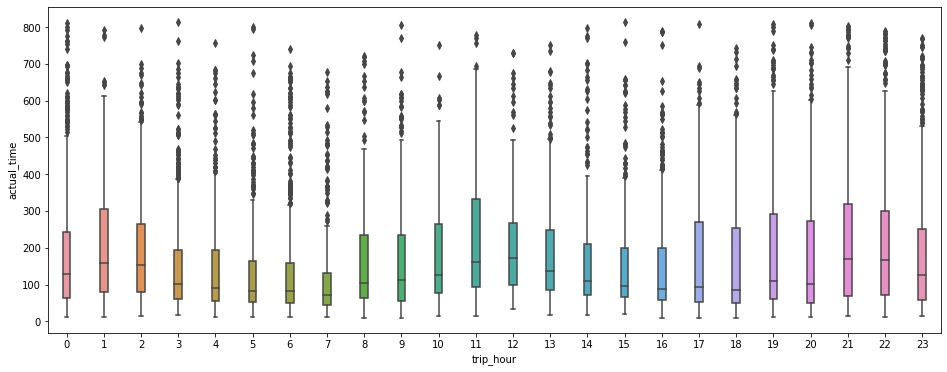

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_hour", y = "actual_time", data = trip, width=0.2)
plt.show()

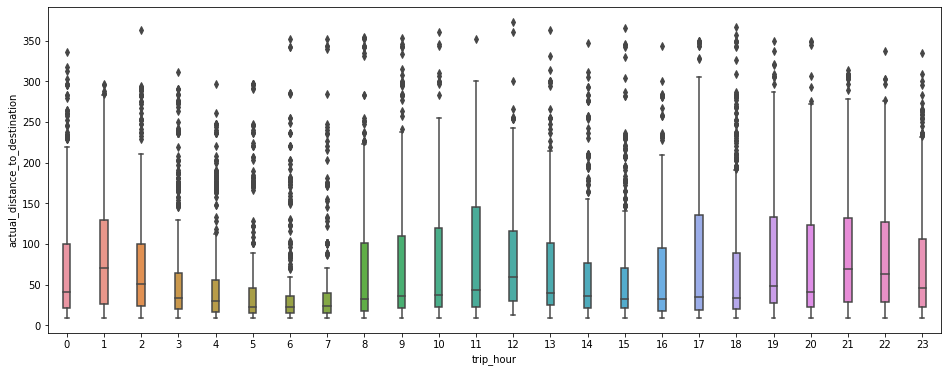

In [64]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_hour", y = "actual_distance_to_destination", data = trip, width=0.2)
plt.show()

Time and distances follow similar trends against the hour of the day. Maximum time and distance deliveries are likely to be made during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7 PM and 1 AM. 

#### 
#### Distribution of time taken and distance covered by deliveries depending on the day of the week

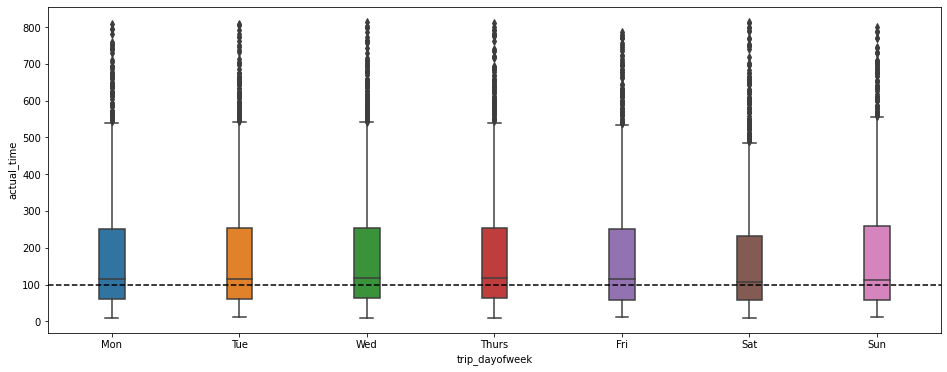

In [65]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_dayofweek", y = "actual_time", data = trip, width=0.2, order = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.axhline(y=100, color='k', ls = '--')
plt.show()

On average, time taken is slightly more on weekdays and Sunday as compared to Saturday. However, they are very similar.

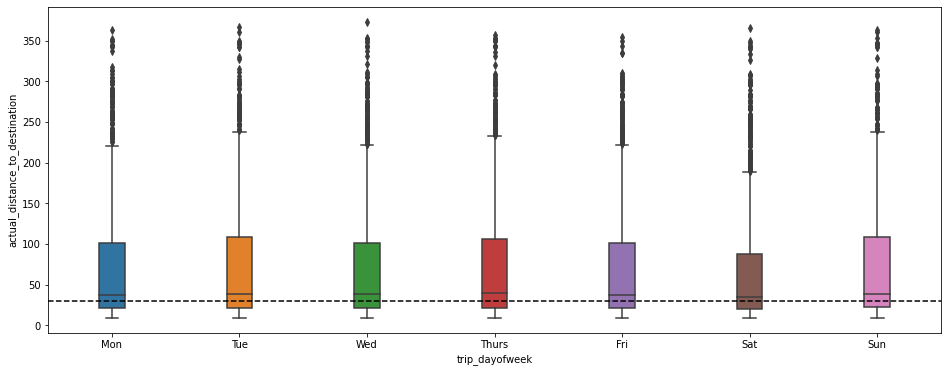

In [66]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_dayofweek", y = "actual_distance_to_destination", data = trip, width=0.2, order = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.axhline(y=30, color='k', ls = '--')
plt.show()

Distance covered is also lowest on Saturday.

#### 
#### Route Type Distributions for Top 3 States 

#### Destination States

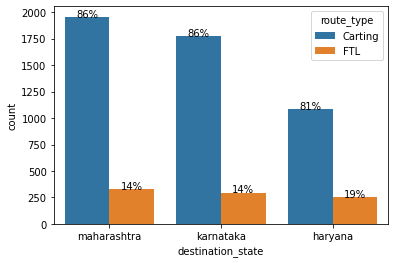

In [67]:
top3d = trip[(trip["destination_state"]=='maharashtra')|(trip["destination_state"]=='karnataka')|(trip["destination_state"]=='haryana')]
top3d = top3d[['route_type','destination_state']]
top3d['route_type'] = top3d['route_type'].map({0:'FTL',1:'Carting'})

st = ['maharashtra','karnataka','haryana']

g = sns.countplot(x='destination_state',hue='route_type', data=top3d, order = st)

percx = []

for e in st:
    percx.append(top3d[(top3d['destination_state']==e)&(top3d["route_type"]=="Carting")].shape[0]/top3d[top3d['destination_state']==e].shape[0])
for e in st:
    percx.append(top3d[(top3d['destination_state']==e)&(top3d["route_type"]=="FTL")].shape[0]/top3d[top3d['destination_state']==e].shape[0])
    
i=0
for p in g.patches:
    txt = str((round(percx[i]*100))) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x+0.1,txt_y,txt)
    i+=1
plt.show()

So we see that for top 3 destination states, Maharashtra hs 86% Carting and 14% FTL, Karnataka has 86% Carting and 14% FTL, Haryana has 81% Carting and 19% FTL.

#### Source States

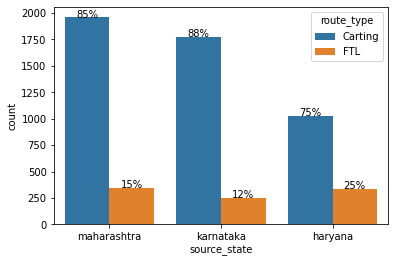

In [68]:
top3s = trip[(trip["source_state"]=='maharashtra')|(trip["source_state"]=='karnataka')|(trip["source_state"]=='haryana')]
top3s = top3s[['route_type','source_state']]
top3s['route_type'] = top3s['route_type'].map({0:'FTL',1:'Carting'})

g = sns.countplot(x='source_state',hue='route_type', data=top3s, order = st)

percx = []

for e in st:
    percx.append(top3s[(top3s['source_state']==e)&(top3s["route_type"]=="Carting")].shape[0]/top3s[top3s['source_state']==e].shape[0])
for e in st:
    percx.append(top3s[(top3s['source_state']==e)&(top3s["route_type"]=="FTL")].shape[0]/top3s[top3s['source_state']==e].shape[0])
    
i=0
for p in g.patches:
    txt = str((round(percx[i]*100))) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x+0.1,txt_y,txt)
    i+=1
plt.show()

So we see that for top 3 source states, Maharashtra hs 85% Carting and 15% FTL, Karnataka has 88% Carting and 12% FTL, Haryana has 75% Carting and 25% FTL.

#### 
### Hypothesis Testing

#### 1. start_scan_to_end_scan  v/s  od_time_diff_hour 

H0 : The mean of both groups are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

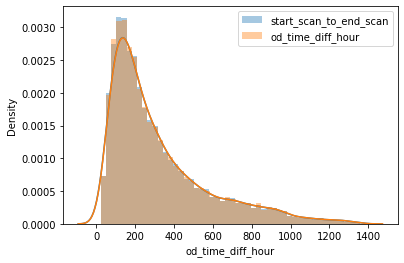

In [69]:
sns.distplot(trip["start_scan_to_end_scan"], label="start_scan_to_end_scan")
sns.distplot(trip["od_time_diff_hour"], label="od_time_diff_hour")
plt.legend()
plt.show()

From the above plot, the means indeed appear to be the same. We will perform 2-sample t-test to find out. 
But first we shall convert our data to a normal distribution using boxcox transformation.

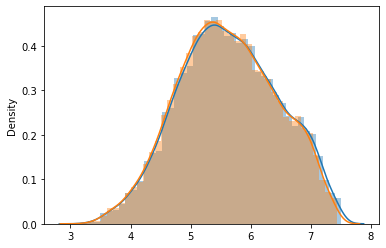

In [70]:
from scipy.stats import boxcox

x_trf1 , lambda1 = boxcox(trip["start_scan_to_end_scan"])
x_trf2 , lambda2 = boxcox(trip["od_time_diff_hour"])

sns.distplot(x_trf1)
sns.distplot(x_trf2)
plt.show()

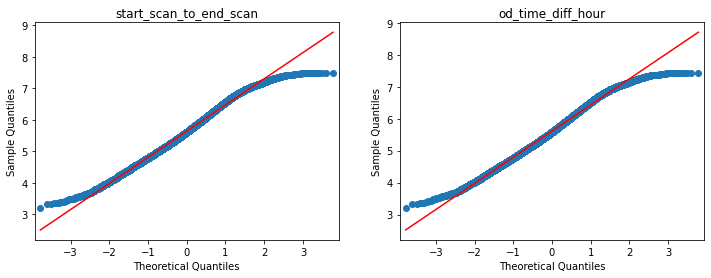

In [71]:
import statsmodels.api as sms

fig, ax = plt.subplots(1,2,figsize=(12,4))
sms.qqplot(x_trf1, line='s', ax = ax[0])
sms.qqplot(x_trf2, line='s', label='od_time_diff_hour', ax = ax[1])

ax[0].set_title('start_scan_to_end_scan')
ax[1].set_title('od_time_diff_hour')

plt.show()

Since our data is not normal even after trying BoxCox transform, we perform a non-parametric test (Mann-Whitney).
Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [72]:
from scipy.stats import mannwhitneyu

In [73]:
stat, p = mannwhitneyu(trip["start_scan_to_end_scan"], trip["od_time_diff_hour"])

In [74]:
p

0.7366629968419203

Since p > $\alpha$ (0.05), we fail to reject the null hypothesis. Hence, the sample distributions seem to be the same for 'start_scan_to_end_scan' and 'od_time_diff_hour'. So, the trip duration and the difference between trip start and end are indeed the same.

#### 
#### 2. actual_time  v/s  osrm_time 

H0 : The mean of actual_time and calculated(osrm) time are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

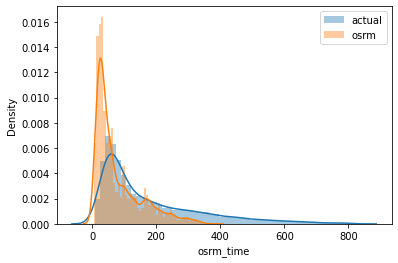

In [75]:
sns.distplot(trip["actual_time"], label="actual")
sns.distplot(trip["osrm_time"], label="osrm")
plt.legend()
plt.show()

From the plot above, it is clear that these do not follow normal distribution. So we go for the non-parametric Mann-Whitney test.
Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [76]:
stat, p = mannwhitneyu(trip["actual_time"].sample(1000), trip["osrm_time"].sample(1000))
p

7.98073622371822e-72

Since p < $\alpha$ (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So, the actual time and th time calculated by algorithm (osrm) are very different. 

#### 
#### 3. actual_time  v/s  segment_actual_time 

H0 : The mean of actual_time and segment_actual_time are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

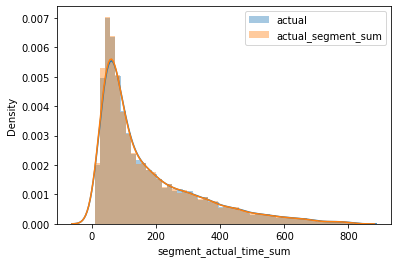

In [77]:
sns.distplot(trip["actual_time"], label="actual")
sns.distplot(trip["segment_actual_time_sum"], label="actual_segment_sum")
plt.legend()
plt.show()

Once again, we see that the times are not normally distributed. However, the distributions look similar. We use the non parametric Mann-Whitney test again. 
Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [78]:
stat, p = mannwhitneyu(trip["actual_time"].sample(1000), trip["segment_actual_time_sum"].sample(1000))
p

0.141952881812958

Since p > $\alpha$ (0.05), we fail to reject the null hypothesis. Hence, the sample distributions seem to be the same for 'segment_actual_time' and 'actual_time'. So, the actual total time taken for a trip is similar to the sum of the distances of a trip's segments.

#### 
#### 4. osrm_distance  v/s  segment_osrm_distance_sum	

H0 : The mean of osrm_distance and segment_osrm_distance_sum are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

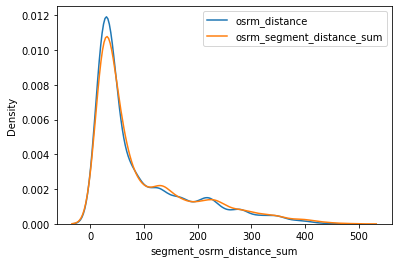

In [79]:
sns.distplot(trip["osrm_distance"], hist=False, label="osrm_distance")
sns.distplot(trip["segment_osrm_distance_sum"], hist=False, label="osrm_segment_distance_sum")
plt.legend()
plt.show()

Once again, these distributions look slightly different. Also, they are not normal. We use the non paramteric Mann-Whitney test. Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [80]:
stat, p = mannwhitneyu(trip["osrm_distance"], trip["segment_osrm_distance_sum"])
p

1.8349406474411988e-08

Since p <  𝛼  (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So, the overall distance calculated by osrm and the sum of individual segment distances caluclated by osrm are different.

#### 
#### 5. osrm_time  v/s  segment_osrm_time_sum	

H0 : The mean of osrm_time and segment_osrm_time_sum are equal.

H1: The mean are not equal.

$\alpha$ = 0.05

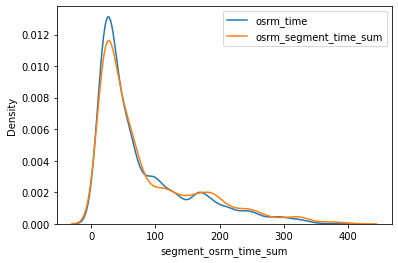

In [81]:
sns.distplot(trip["osrm_time"], hist=False, label="osrm_time")
sns.distplot(trip["segment_osrm_time_sum"], hist=False, label="osrm_segment_time_sum")
plt.legend()
plt.show()

The distributions look slightly different and are not normal. We use non parametric Mann-Whitney test.
Now our H0 and H1 become :

H0 : The median of both groups are equal.

H1: The median are not equal.

In [82]:
stat, p = mannwhitneyu(trip["osrm_time"], trip["segment_osrm_time_sum"])
p

3.7243838320849166e-10

Since p <  𝛼  (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So, the overall time calculated by osrm and the sum of individual segment time caluclated by osrm are different.

#### 
#### 6. Does distance depend on route type?

H0: The median distance of FTL and Carting is same.

H1: The median are different.

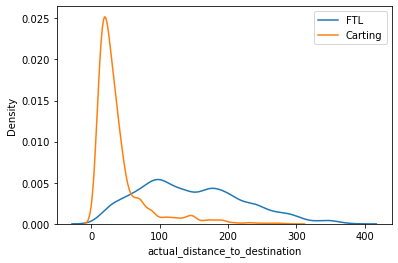

In [83]:
sns.distplot(trip[trip["route_type"]==0]["actual_distance_to_destination"], hist=False, label="FTL")
sns.distplot(trip[trip["route_type"]==1]["actual_distance_to_destination"], hist=False, label="Carting")
plt.legend()
plt.show()

The ditributions are clearly different and not normal. So we use non paramteric Mann-Whitney test.

In [84]:
stat, p = mannwhitneyu(trip[trip["route_type"]==0]["actual_distance_to_destination"], trip[trip["route_type"]==1]["actual_distance_to_destination"])
p

0.0

Since p <  𝛼  (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So, the actual distances covered for FTL routes is different from that of Carting routes.

#### 
#### 7. Does time taken depend on day of week?

H0: The median time taken of all week days are same.

H1: The median are different.

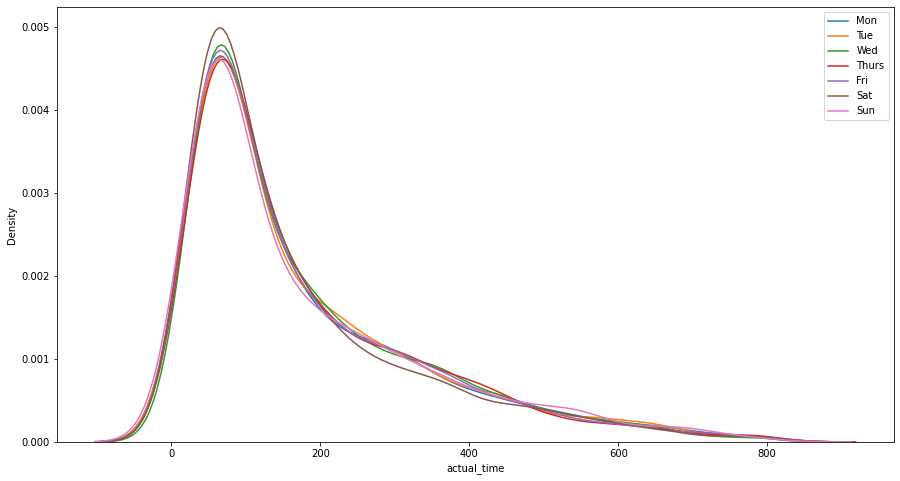

In [85]:
plt.figure(figsize=(15,8))
days = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']

daydist=[]

for day in days:
    daydist.append(trip[trip["trip_dayofweek"]==day]["actual_time"])
    sns.distplot(trip[trip["trip_dayofweek"]==day]["actual_time"], hist=False, label=day)
    
plt.legend()
plt.show()

The distributions look slightly different. 
We will perform the non-parametric counterpart to one way ANOVA, the Kruskal Willis Test (and hence the medians in our hypothesis).

In [86]:
stats.kruskal(daydist[0],daydist[1],daydist[2],daydist[3],daydist[4],daydist[5],daydist[6])

KruskalResult(statistic=8.743242607332519, pvalue=0.18854113288304772)

Since p >  𝛼  (0.05), we fail to reject the null hypothesis. Hence, the sample distributions of time taken seem to be the same for all week days. 

#### 

#### Normalize/Standardize the numerical features using MinMax Scaler/ Standard Scaler

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [89]:
trip[num_cols] = scaler.transform(trip[num_cols])
trip[num_cols]

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.262662,-0.145358
1,-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.878225,-0.823653
2,1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.365464,0.514899
3,-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.790288,-0.737295
4,-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.915913,-0.906532
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.246189,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.300349,-0.349273
12719,-1.018130,-1.017809,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.941038,-0.863608
12720,0.394533,0.395103,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.026276,0.072932
12721,0.104957,0.107436,0.865940,0.547267,1.390274,0.886261,0.523279,1.697092,1.324267


In [90]:
trip[num_cols].describe()

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-1.452025e-16,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,6.031487e-17,-8.488760e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-1.162915e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-1.003850e+00,-9.375981e-01
25%,-7.207269e-01,-7.210516e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.274750e-01,-7.228116e-01
50%,-3.411472e-01,-3.418602e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.134119e-01,-4.628077e-01
75%,4.023595e-01,4.020802e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.910897e-01,4.488499e-01
max,4.049455e+00,4.050310e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.046283e+00,4.130135e+00


#### 
## Business Insights

1. Most trips use "Carting" (\~8K) transportation type as opposed to "FTL" (~4K).
2.  Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi, Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So we see that the Southern, Western and Northern corridors have the top contributing cities.
3. The top contributor states (both source and destination) are  : Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. Again we see Western, Southern and Northern corridors have significant contribution to the traffic.
4.  The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka, Tamil Nadu, Telengana, UP.
5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra, amil Nadu, Telengana and Andhra.
6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai, Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.
7. Hourly distribution of number of trips in a day : minimum trips occuring during the day hours (8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).
8. Week Day : we see that maximum number of trips are happening on Wednesday and minimum on Sunday.
9. OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.
10.  OSRM seems to be calculating distance as less than what distance is actually covered. So, OSRM is underestimating time and overestimting the distance.
11. The time taken by full truck load deliveries is on average, a lot higher (>300 hours) (this is because the distance covered by trucks is also mucvh higher since they don't make stops) than the cart deliveries (<100 hours). The full truck load deliveries cover much longer distances on average (>150 kms) than carting deliveries (~ 25 kms).
12. Hourly distribution of trip time and distances : Time and distances follow similar trends against the hour of the day. Maximum time and distance deliveries are likely to be made during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7 PM and 1 AM. 
13. Weekday distribution of trip time and distances : On average, time taken is slightly more on weekdays and Sunday as compared to Saturday. However, they are very similar. Distances covered is also lowest on Saturday.
14. Route type of top 3 Destination states : Maharashtra has 86% Carting and 14% FTL, Karnataka has 86% Carting and 14% FTL, Haryana has 81% Carting and 19% FTL.
15.  Route type of top 3 Source states : Maharashtra hs 85% Carting and 15% FTL, Karnataka has 88% Carting and 12% FTL, Haryana has 75% Carting and 25% FTL.

#### 
## Recommendations

1. Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning. We need to check for discrrepancies with transporters nd to check if the routing engine is configured for optimum performance. 

2. We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.

3. There is a need to plan resources (specifically during regional festivities) in the states/cities which have highest contribution to traffic. 

4. Road network can be taken into consideration to increase the number of FTL deliveries inter state and to connect the states where there is lower traffic. 

5. Since intra state or intra city trips are more likely to be using "carting" as mehod of transport, the number of hubs could be increased in those cities and states which have highest contribution to traffic.